In [1]:
import pandas as pd
import json

%matplotlib inline

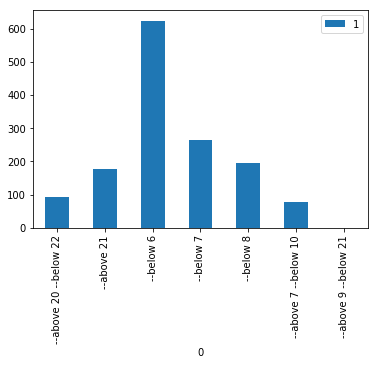

In [2]:
conf_file = '~/ownCloud/Github/home_automation/home_assistant/binary_sensors/obscure_events.yaml'
index = 1
target = 'sensor.hour_of_day'
conditions = [
    '--above 20 --below 22',
    '--above 21',
    '--below 6',
    '--below 7',
    '--below 8',
    '--above 7 --below 10',
    '--above 9 --below 21',
]

match_tuples = []
for cond in conditions:
    result = !smass bayes -si {index} -c {conf_file}  -te {target} {cond} -s
    result_string = ''.join(result.fields()[0])
    match_count = json.loads(result_string)[0]['total_matching']
    
    match_tuples.append((cond, match_count))
    
match_df = pd.DataFrame(match_tuples).set_index(0)
match_df.plot(kind='bar');